In [3]:
import xarray as xr
import datatree
from dask.distributed import Client, progress
from dask.distributed import Client, LocalCluster

In [4]:
cluster = LocalCluster(dashboard_address='127.0.0.1:8782')  
cluster

/data/keeling/a/alfonso8/miniconda3/envs/raw2zarr/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8782 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34496 instead
  warnings.warn(


LocalCluster(99e438d1, 'tcp://127.0.0.1:33570', workers=8, threads=48, memory=48.00 GiB)

In [5]:
path_car = '/data/scratch/a/alfonso8/Carimagua.zarr'

In [6]:
dt_car = datatree.open_datatree(path_car, engine='zarr', decode_times=False,
                   chunks={'vcp_time':10, 'azimuth':-1, 'range':-1 })

In [7]:
dt_car

DataTree('None', parent=None)
├── DataTree('sweep_0')
│       Dimensions:            (vcp_time: 1845, azimuth: 720, range: 994)
│       Coordinates:
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float32 3kB 0.25 0.75 1.25 ... 359.2 359.8
│           crs_wkt            int64 8B ...
│           elevation          (azimuth) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
│           latitude           float64 8B ...
│           longitude          float64 8B ...
│         * range              (range) float32 4kB 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
│           time               (azimuth) float64 6kB dask.array<chunksize=(720,), meta=np.ndarray>
│         * vcp_time           (vcp_time) float64 15kB 7.126e+11 7.126e+11 ... 7.132e+11
│           x                  (azimuth, range) float64 6MB dask.array<chunksize=(720, 994), meta=np.ndarray>
│           y                  (azimuth, range) float64 6MB dask.array<chunksize=(720, 994), meta=np.ndarray>
│           z                  (azimuth, range) float64 6MB dask.array<chunksize=(720, 994), meta=np.ndarray>
│       Data variables: (12/17)
│           DBTH               (vcp_time, azimuth, range) float32 5GB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
│           DBZH               (vcp_time, azimuth, range) float32 5GB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
│           DB_DBTE8           (vcp_time, azimuth, range) float32 5GB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
│           DB_DBZE8           (vcp_time, azimuth, range) float32 5GB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
│           DB_HCLASS          (vcp_time, azimuth, range) int16 3GB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
│           KDP                (vcp_time, azimuth, range) float32 5GB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
│           ...                 ...
│           ZDR                (vcp_time, azimuth, range) float32 5GB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
│           follow_mode        (vcp_time) <U7 52kB dask.array<chunksize=(10,), meta=np.ndarray>
│           prt_mode           (vcp_time) <U7 52kB dask.array<chunksize=(10,), meta=np.ndarray>
│           sweep_fixed_angle  (vcp_time) float64 15kB dask.array<chunksize=(10,), meta=np.ndarray>
│           sweep_mode         (vcp_time) <U20 148kB dask.array<chunksize=(10,), meta=np.ndarray>
│           sweep_number       (vcp_time) int64 15kB dask.array<chunksize=(10,), meta=np.ndarray>
├── DataTree('sweep_5')
│       Dimensions:            (vcp_time: 1831, azimuth: 360, range: 581)
│       Coordinates:
│           altitude           float64 8B ...
│         * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
│           crs_wkt            int64 8B ...
│           elevation          (azimuth) float32 1kB dask.array<chunksize=(360,), meta=np.ndarray>
│           latitude           float64 8B ...
│           longitude          float64 8B ...
│         * range              (range) float32 2kB 1e+03 1.3e+03 ... 1.747e+05 1.75e+05
│           time               (azimuth) float64 3kB dask.array<chunksize=(360,), meta=np.ndarray>
│         * vcp_time           (vcp_time) float64 15kB 7.126e+11 7.126e+11 ... 7.132e+11
│           x                  (azimuth, range) float64 2MB dask.array<chunksize=(360, 581), meta=np.ndarray>
│           y                  (azimuth, range) float64 2MB dask.array<chunksize=(360, 581), meta=np.ndarray>
│           z                  (azimuth, range) float64 2MB dask.array<chunksize=(360, 581), meta=np.ndarray>
│       Data variables: (12/17)
│           DBTH               (vcp_time, azimuth, range) float32 2GB dask.array<chunksize=(10, 360, 581), meta=np.ndarray>
│           DBZH               (vcp_time, azimuth, range) float32 2GB dask.array<chunksize=(10, 360, 581), meta=np.ndarray>
│           DB_DBTE8           (vcp_time, azimuth, range) float32 2GB dask.array<chu

In [8]:
ds_sw9 = dt_car['sweep_9'].ds

In [9]:
ds_sw9

<xarray.DatasetView> Size: 19GB
Dimensions:            (vcp_time: 1763, azimuth: 360, range: 654)
Coordinates:
    altitude           float64 8B ...
  * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
    crs_wkt            int64 8B ...
    elevation          (azimuth) float32 1kB dask.array<chunksize=(360,), meta=np.ndarray>
    latitude           float64 8B ...
    longitude          float64 8B ...
  * range              (range) float32 3kB 1e+03 1.15e+03 ... 9.88e+04 9.895e+04
    time               (azimuth) float64 3kB dask.array<chunksize=(360,), meta=np.ndarray>
  * vcp_time           (vcp_time) float64 14kB 7.126e+11 7.126e+11 ... 7.132e+11
    x                  (azimuth, range) float64 2MB dask.array<chunksize=(360, 654), meta=np.ndarray>
    y                  (azimuth, range) float64 2MB dask.array<chunksize=(360, 654), meta=np.ndarray>
    z                  (azimuth, range) float64 2MB dask.array<chunksize=(360, 654), meta=np.ndarray>
Data variables: (12/17)
    DBTH               (vcp_time, azimuth, range) float32 2GB dask.array<chunksize=(10, 360, 654), meta=np.ndarray>
    DBZH               (vcp_time, azimuth, range) float32 2GB dask.array<chunksize=(10, 360, 654), meta=np.ndarray>
    DB_DBTE8           (vcp_time, azimuth, range) float32 2GB dask.array<chunksize=(10, 360, 654), meta=np.ndarray>
    DB_DBZE8           (vcp_time, azimuth, range) float32 2GB dask.array<chunksize=(10, 360, 654), meta=np.ndarray>
    DB_HCLASS          (vcp_time, azimuth, range) int16 830MB dask.array<chunksize=(10, 360, 654), meta=np.ndarray>
    KDP                (vcp_time, azimuth, range) float32 2GB dask.array<chunksize=(10, 360, 654), meta=np.ndarray>
    ...                 ...
    ZDR                (vcp_time, azimuth, range) float32 2GB dask.array<chunksize=(10, 360, 654), meta=np.ndarray>
    follow_mode        (vcp_time) <U7 49kB dask.array<chunksize=(10,), meta=np.ndarray>
    prt_mode           (vcp_time) <U7 49kB dask.array<chunksize=(10,), meta=np.ndarray>
    sweep_fixed_angle  (vcp_time) float64 14kB dask.array<chunksize=(10,), meta=np.ndarray>
    sweep_mode         (vcp_time) <U20 141kB dask.array<chunksize=(10,), meta=np.ndarray>
    sweep_number       (vcp_time) int64 14kB dask.array<chunksize=(10,), meta=np.ndarray>

In [10]:
qvp = ds_sw9.mean('azimuth')

In [11]:
qvp

<xarray.Dataset> Size: 60MB
Dimensions:            (vcp_time: 1763, range: 654)
Coordinates:
    altitude           float64 8B ...
    crs_wkt            int64 8B ...
    latitude           float64 8B ...
    longitude          float64 8B ...
  * range              (range) float32 3kB 1e+03 1.15e+03 ... 9.88e+04 9.895e+04
  * vcp_time           (vcp_time) float64 14kB 7.126e+11 7.126e+11 ... 7.132e+11
Data variables: (12/17)
    DBTH               (vcp_time, range) float32 5MB dask.array<chunksize=(10, 654), meta=np.ndarray>
    DBZH               (vcp_time, range) float32 5MB dask.array<chunksize=(10, 654), meta=np.ndarray>
    DB_DBTE8           (vcp_time, range) float32 5MB dask.array<chunksize=(10, 654), meta=np.ndarray>
    DB_DBZE8           (vcp_time, range) float32 5MB dask.array<chunksize=(10, 654), meta=np.ndarray>
    DB_HCLASS          (vcp_time, range) float64 9MB dask.array<chunksize=(10, 654), meta=np.ndarray>
    KDP                (vcp_time, range) float32 5MB dask.array<chunksize=(10, 654), meta=np.ndarray>
    ...                 ...
    ZDR                (vcp_time, range) float32 5MB dask.array<chunksize=(10, 654), meta=np.ndarray>
    follow_mode        (vcp_time) <U7 49kB dask.array<chunksize=(10,), meta=np.ndarray>
    prt_mode           (vcp_time) <U7 49kB dask.array<chunksize=(10,), meta=np.ndarray>
    sweep_fixed_angle  (vcp_time) float64 14kB dask.array<chunksize=(10,), meta=np.ndarray>
    sweep_mode         (vcp_time) <U20 141kB dask.array<chunksize=(10,), meta=np.ndarray>
    sweep_number       (vcp_time) int64 14kB dask.array<chunksize=(10,), meta=np.ndarray>

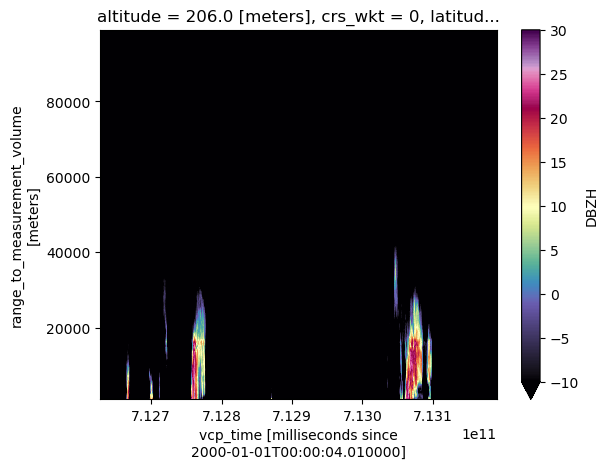

In [12]:
qvp.isel(vcp_time=range(500, 600), range=range()).DBZH.plot(x='vcp_time', y='range', cmap='ChaseSpectral', vmin=-10, vmax=30)

In [18]:
path_gua = '/data/scratch/a/alfonso8/Guaviare.zarr'

In [19]:
dt_gua = datatree.open_datatree(path_gua, engine='zarr', decode_times=False,
                   chunks={'vcp_time':10, 'azimuth':-1, 'range':-1 })

In [20]:
dt_gua

DataTree('None', parent=None)
└── DataTree('sweep_0')
        Dimensions:            (vcp_time: 126, azimuth: 720, range: 994)
        Coordinates:
            altitude           float64 8B ...
          * azimuth            (azimuth) float32 3kB 0.25 0.75 1.25 ... 359.2 359.8
            crs_wkt            int64 8B ...
            elevation          (azimuth) float64 6kB dask.array<chunksize=(720,), meta=np.ndarray>
            latitude           float64 8B ...
            longitude          float64 8B ...
          * range              (range) float32 4kB 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
            time               (azimuth) float64 6kB dask.array<chunksize=(720,), meta=np.ndarray>
          * vcp_time           (vcp_time) float64 1kB 7.074e+11 7.074e+11 ... 7.074e+11
            x                  (azimuth, range) float64 6MB dask.array<chunksize=(720, 994), meta=np.ndarray>
            y                  (azimuth, range) float64 6MB dask.array<chunksize=(720, 994), meta=np.ndarray>
            z                  (azimuth, range) float64 6MB dask.array<chunksize=(720, 994), meta=np.ndarray>
        Data variables: (12/17)
            DBTH               (vcp_time, azimuth, range) float32 361MB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
            DBZH               (vcp_time, azimuth, range) float32 361MB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
            DB_DBTE8           (vcp_time, azimuth, range) float32 361MB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
            DB_DBZE8           (vcp_time, azimuth, range) float32 361MB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
            DB_HCLASS          (vcp_time, azimuth, range) int16 180MB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
            KDP                (vcp_time, azimuth, range) float32 361MB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
            ...                 ...
            ZDR                (vcp_time, azimuth, range) float32 361MB dask.array<chunksize=(10, 720, 994), meta=np.ndarray>
            follow_mode        (vcp_time) <U7 4kB dask.array<chunksize=(10,), meta=np.ndarray>
            prt_mode           (vcp_time) <U7 4kB dask.array<chunksize=(10,), meta=np.ndarray>
            sweep_fixed_angle  (vcp_time) float64 1kB dask.array<chunksize=(10,), meta=np.ndarray>
            sweep_mode         (vcp_time) <U20 10kB dask.array<chunksize=(10,), meta=np.ndarray>
            sweep_number       (vcp_time) int64 1kB dask.array<chunksize=(10,), meta=np.ndarray>